# Introducción a la Programación en MATLAB (C1)

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

Agosto 2017

**Descripción**

Este curso enseña programación en Matlab a aquellos que tienen muy poca o ninguna experiencia previa en el tema. Matlab es usado como programa base porque es fácil de aprender, es versátil, y es muy útil para el análisis numérico. Además es, por ahora, el estándar en la profesión. Cómo complemento, a lo largo del curso se presentarán diversas aplicaciones a problemas económicos. El curso requiere que el alumno acompañe las clases con su computador para replicar los ejercicios y aplicaciones provistas.

**Material**

[www.mauriciotejada.com](https://mauriciotejada.com) en la sección *Teaching* encontrarán *Introduction to Programming in Matlab*. Ahí estarán disponibles todos los *notebooks* y los archivos complementarios asociados a las clases.

**Consultas y horas de oficina**

Erasmo Escala 1835 Oficina 211 (Segundo Piso)

[matejada@uahurtado.cl](mailto:matejada@uahurtado.cl)

## Contenidos

- [Motivación](#1.-Motivación:-Soluciones-Numéricas-vs-Soluciones-Algebraicas)

## 1. Motivación: Soluciones Numéricas vs Soluciones Algebraicas

Para motivar tomamos el ejemplo presentado en el capítulo introductorio del libro de [Miranda y Fackler](https://mitpress.mit.edu/books/applied-computational-economics-and-finance).

Consideremos la siguiente función de demanda: 
$$q=p^{-0.2}$$

Dos preguntas fáciles de responder: 

1. ¿Cuál es la función inversa de demanda?
2. ¿Cuál es el precio que clarea el mercado cuando la cantidad es 2?

Respuestas:

1. Solución algebraica:
$$p=q^{-5}$$

2. Usando una calculadora:

In [1]:
p=2^-5

p =

    0.0312


Ahora intentemos con una función de demanda algo diferente:
$$q=0.5p^{-0.2} + 0.5p^{-0.5}$$

Esta función contiene dos términos: 
- Una demanda doméstica.
- Una demanda por exportación.

Usando argumentos formales basados en los teoremas del Valor Intermedio y de la Función Implícita se puede establecer que la función inversa de demanda está bien definida, es continua y estrictamente decreciente. Por tanto, existe un único precio que clarea el mercado.

Solución a las preguntas (1) y (2): No existe un solución cerrada para la función inversa de demanda. ¿Cómo calculamos el precio que clarea el mercado?

** Alternativa: ** Solución numérica.

In [2]:
p = 0.25;
for i=1:100
  deltap = (.5*p^-.2+.5*p^-.5-2)/(.1*p^-1.2 + .25*p^-1.5);
  p = p + deltap;
  if abs(deltap) < 1.e-8, break, end
end 
disp(p);

0.1542


Incluso podemos ver como luce la función de demanda inversa usando la misma idea:

In [3]:
q = (0.5:0.1:2.2)';
P = zeros(length(q),1);
for j=1:length(q)
    p = 0.25;
    for i=1:100
        deltap = (.5*p^-.2+.5*p^-.5-q(j))/(.1*p^-1.2 + .25*p^-1.5);
        p = p + deltap;
        if abs(deltap) < 1.e-8, break, end
    end 
    P(j) = p;
end;

disp([q P]);

0.5000    8.3553
    0.6000    4.6392
    0.7000    2.8710
    0.8000    1.9178
    0.9000    1.3553
    1.0000    1.0000
    1.1000    0.7634
    1.2000    0.5990
    1.3000    0.4808
    1.4000    0.3932
    1.5000    0.3268
    1.6000    0.2753
    1.7000    0.2348
    1.8000    0.2023
    1.9000    0.1759
    2.0000    0.1542
    2.1000    0.1362
    2.2000    0.1210


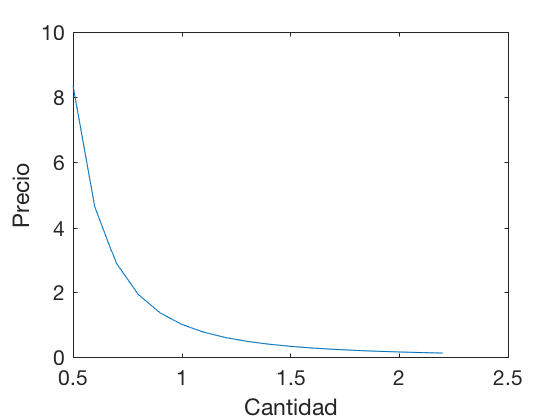

In [4]:
plot(q,P);
ylabel('Precio');
xlabel('Cantidad');

Incluso podríamos usar interpolación lineal para evaluar puntos de la función de demanda fuera de los encontrados en la tabla que caracteriza la demanda:

In [5]:
pi = interp1(q,P,1.456)

pi =

    0.3560
